Please select an audio you would like to test on this algorithm


Saving Test Audio 1.wav to Test Audio 1.wav
PSNR (Noisy Signal): 44.00 dB
PSNR (Denoised Signal): 40.85 dB


Playing Original Audio


Playing Noisy Audio


Playing Denoised Audio


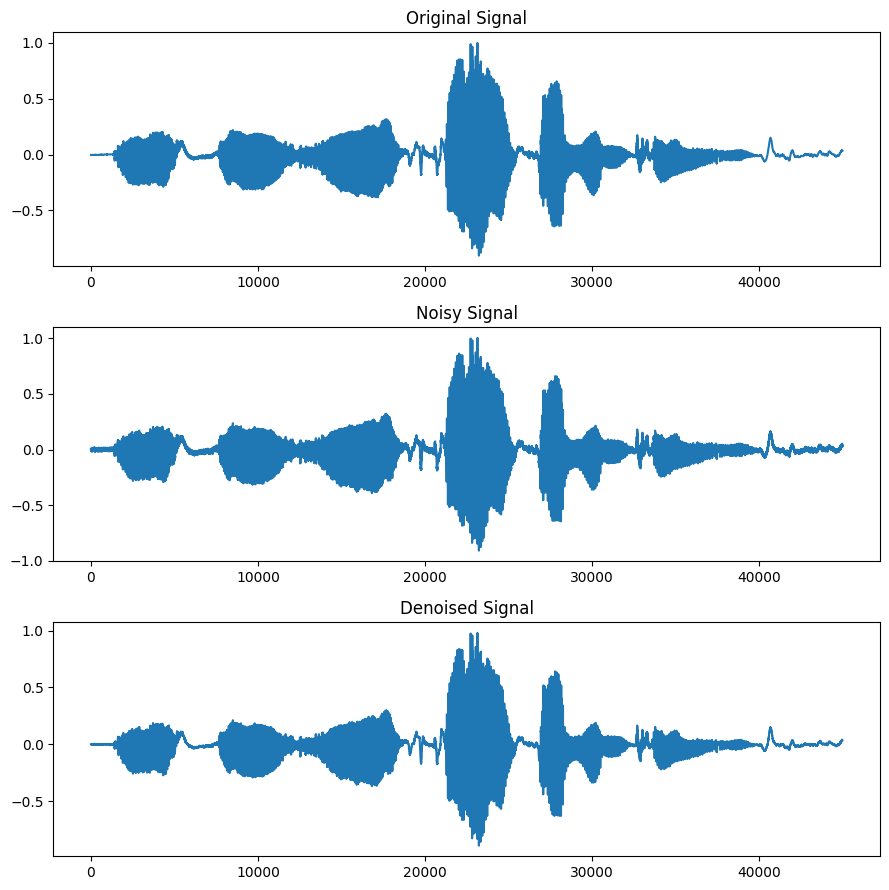

In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from scipy.io import wavfile
from google.colab import files
from IPython.display import Audio, display

#for result reproducibility
np.random.seed(42)

# PSNR Calculation function
def calculate_psnr(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 1.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# noise addition function
def add_noise(signal, noise_level=0.05):
    noise = np.random.normal(0, np.std(signal) * noise_level, signal.shape)
    return signal + noise

# Wavelet denoising using PyWavelets
def denoise_signal(signal, wavelet='haar', level=4):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    threshold = np.median(np.abs(coeffs[-1])) / 0.6745
    coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
    return pywt.waverec(coeffs, wavelet)

# Upload audio file
print("Please select an audio you would like to test on this algorithm")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load audio file (must be in .wav format)
samplerate, data = wavfile.read(filename)
data = data.astype(np.float32)

# Signal normalization
data = data / np.max(np.abs(data))

# calling the noise addition function
noisy_signal = add_noise(data, noise_level=0.05)

# Denoise the signal
denoised_signal = denoise_signal(noisy_signal)

# Length matching
min_length = min(len(data), len(denoised_signal))
data = data[:min_length]
noisy_signal = noisy_signal[:min_length]
denoised_signal = denoised_signal[:min_length]

# PSNR Calculation
psnr_noisy = calculate_psnr(data, noisy_signal)
psnr_denoised = calculate_psnr(data, denoised_signal)

print(f"PSNR (Noisy Signal): {psnr_noisy:.2f} dB")
print(f"PSNR (Denoised Signal): {psnr_denoised:.2f} dB")

# Save results
wavfile.write('noisy_audio.wav', samplerate, (noisy_signal * 32767).astype(np.int16))
wavfile.write('denoised_audio.wav', samplerate, (denoised_signal * 32767).astype(np.int16))

# Play audio files
display(Audio((data * 32767).astype(np.int16), rate=samplerate))
print("Playing Original Audio")

display(Audio((noisy_signal * 32767).astype(np.int16), rate=samplerate))
print("Playing Noisy Audio")

display(Audio((denoised_signal * 32767).astype(np.int16), rate=samplerate))
print("Playing Denoised Audio")

# Plot results
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.title('Original Signal')
plt.plot(data)

plt.subplot(3, 1, 2)
plt.title('Noisy Signal')
plt.plot(noisy_signal)

plt.subplot(3, 1, 3)
plt.title('Denoised Signal')
plt.plot(denoised_signal)

plt.tight_layout()
plt.show()